### Predicting house prices: a regression example

#### The Boston Housing Price dataset


In [24]:
# Loading the Boston housing dataset

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

#### Preparing the data

Normalizing the data

In [25]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [26]:
mean = train_data.mean(axis =0)
train_data-= mean
std = train_data.std(axis = 0)

train_data/=std
test_data-=mean
test_data/=std


Note that the quantities used for normalizing the test data are computed using the training data.

You should never use in your workflow any quanitity computed on the test data, even for something as simple as data normalization.

#### Building network


The network ends with a single unit and no activation (it will be a linear layer). This is a typical setup for scaler for scaler regression(a regression where you are tying to predict a single continuous value). Applying and activation function would constrain the range the output can take; for instance, if you applied a sigmoid activation function to the last layer, the network could only learn to predict values between 0 and 1. Here,because the last layer is purely linear, the network is free to learn to predict values in any range.

### Validating your approach using K-fold validation

- Splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K-1 partitions. The validation score for the model used is then the average of the K validation scores obtained.

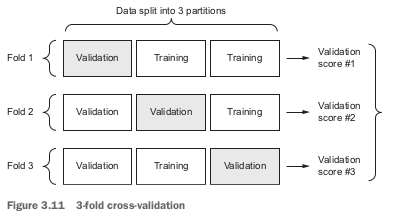

(Image source: the very book, Deep Learning with Python by F.C)

In [27]:
# K-fold validation

import numpy as np

k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
    print('Processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    
    model = build_mopartial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
            train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()

    model.fit(partial_train_data, partial_train_targets,
          epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)

    all_scores.append(val_mae)

    

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [28]:
all_scores

[2.2367353439331055, 3.055293560028076, 2.743931531906128, 2.3132333755493164]

In [29]:
np.mean(all_scores)

2.5872984528541565

### Saving the validation logs at each fold



In [31]:
num_epochs = 500

all_mae_histories = []

for i in range (k):
    print('processing fold #', i)
    val_data = train_data [i*num_val_samples: 
                           (i+1)*num_val_samples]
    
    val_targets = train_targets[i*num_val_samples: 
                                (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],
                                       axis =0)
    
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)
    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets,

    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


#### Building the history of successive mean K-fold validation scores

In [32]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

### Plotting validation scores

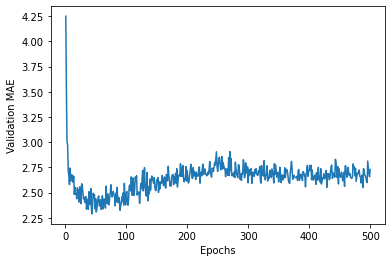

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### Plotting vaidation scores, excluding the first 10 data points

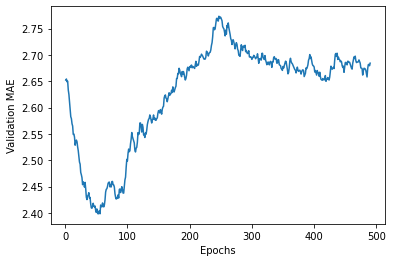

In [35]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### Training the final model

In [36]:
model = build_model()
model.fit(train_data, train_targets,
         epochs = 80, batch_size = 16, verbose =0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.8360 - mae: 2.7339


### Summary:

1. Mean Square Error (Mse) is a loss function commonly used for regression.

2. Evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesnot apply for regression. A common regression metric is mean absolute error (MAE).

3. When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.

4. When there is little data available, using K-fold validation is a great way to reliably evaluate a model.

5. When little training data is available, it is preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting. 

### Finished Chapter 3 of Deep Learning with Python by F.C.